In [124]:
!python -m pip install -i https://pypi.gurobi.com gurobipy

import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gb
import random
import itertools as it

%matplotlib inline

Looking in indexes: https://pypi.gurobi.com


In [61]:
nodes = random.randint(5,10)
seed = random.randint(1,10)
probability = 0.4
G = nx.gnp_random_graph(nodes,probability)

In [62]:
for (u,v,w) in G.edges(data=True):
    w["weight"] = random.randint(1,20)

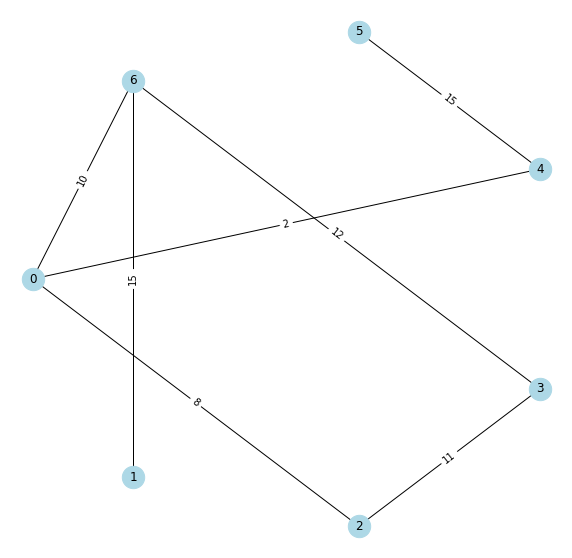

In [63]:
pos = nx.shell_layout(G)

edge_lab = {i:G[i[0]][i[1]]['weight'] for i in G.edges()}
node_lab = {i for i in G.nodes()}

plt.figure(figsize=(10,10))

nx.draw_networkx_edge_labels (G, pos, edge_labels=edge_lab)

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)

In [123]:
subsets = [list(set(it.combinations(set(G.nodes()), n)))) for n in range(3, len(G.nodes()))]
len_subsets = [len(s) for s in subsets]



model = gb.Model("MST")
x = model.addVars(G.edges(), vtype=gb.GRB.BINARY, name="x")
model.setObjective(x.prod(nx.get_edge_attributes(G, "weight")))
model.addConstr(x.sum()<=len(G.nodes())-1, name="constraint1")
model.addConstrs((x.sum()<= len(S) for S in []))
model.update()
model.write("MST.lp")

In [169]:
subsets = [len(list(set(it.combinations(set(G.nodes()), n)))) for n in range(3, len(G.nodes()))]

In [170]:
subsets

[35, 35, 21, 7]